In [1]:
%run EDA.py

# CLASSIFICATION 1

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', encoding = 'ISO-8859-1')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isnull().values.any()

False

In [5]:
df_describe_data=descriptive_stats(df)

In [6]:
df_describe_data.T

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,2.633580e+05,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
median,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,2.620000e+05,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,9.780424e+04,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
var,141.486483,0.246122,941458.571457,0.244102,140.063455,0.228614,9.565669e+09,1.070211,19.469956,0.228614,0.218716,6023.965276,0.218716
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,2.510000e+04,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,2.125000e+05,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,2.620000e+05,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,3.035000e+05,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,8.500000e+05,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000
skew,0.420937,0.276863,4.440689,0.332251,0.552593,0.623583,1.454975e+00,4.433610,-1.042870,-0.623583,0.766479,0.127161,0.766479


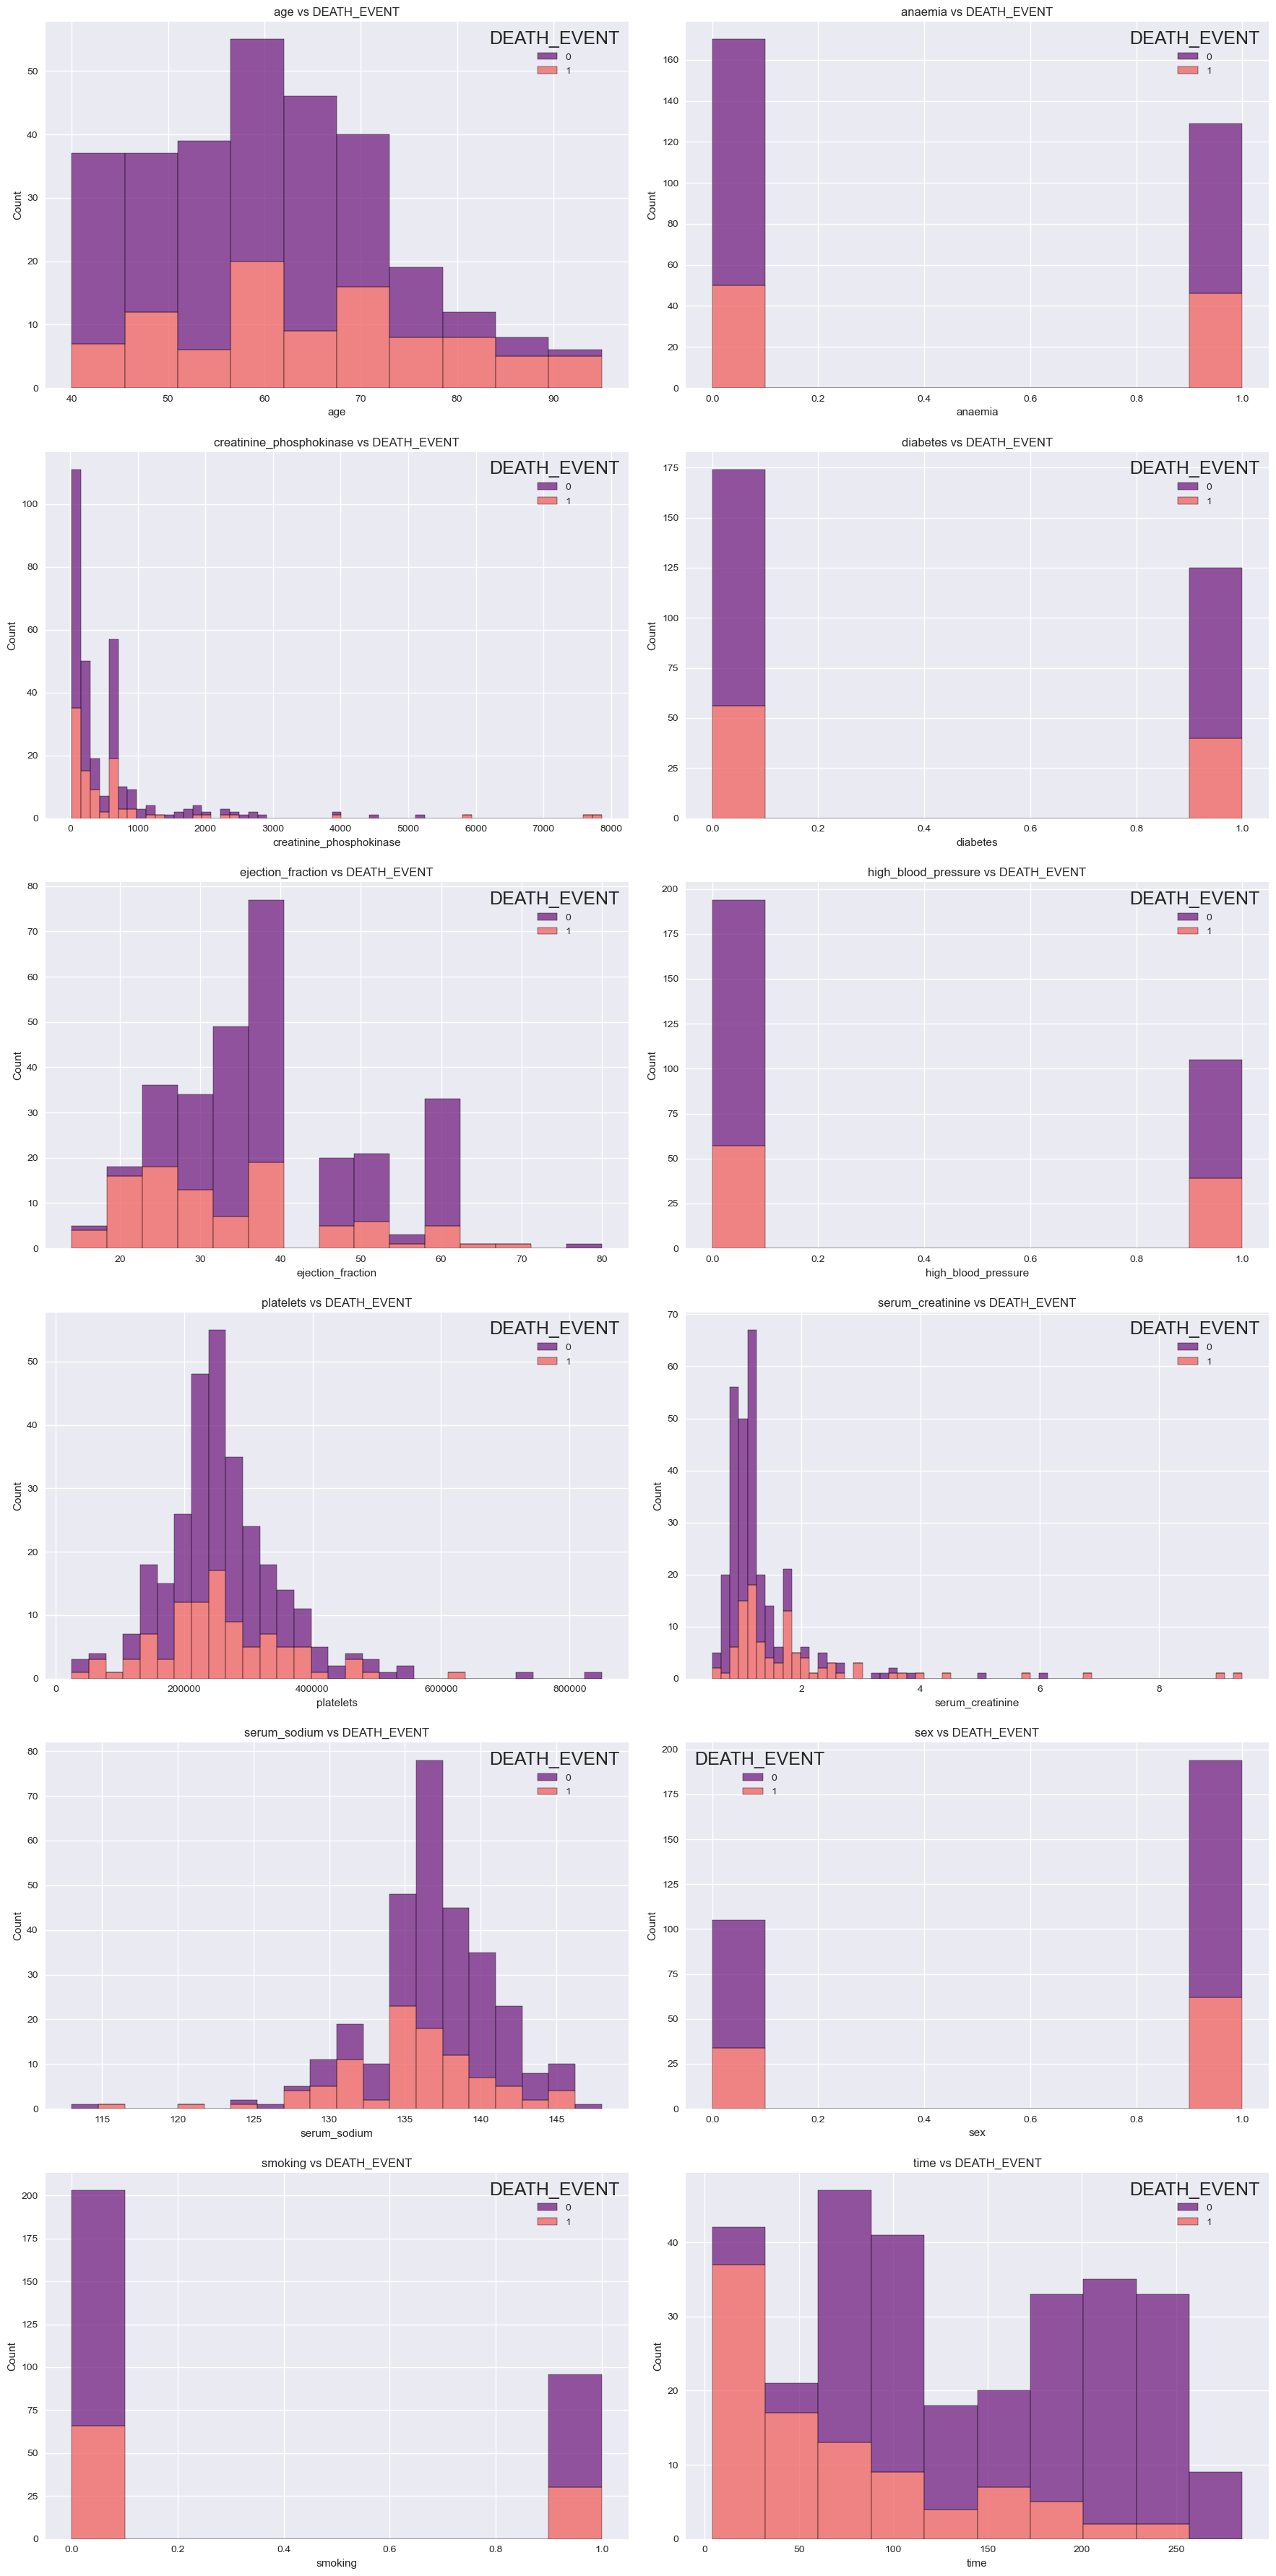

In [7]:
plt.figure(figsize=(18,36))
sns.set_context('talk')
plt.style.use('seaborn')
for i, column in enumerate(df.drop('DEATH_EVENT', axis=1)):
    plt.subplot(6,2,i+1)
    sns.histplot(data=df, x=column, hue="DEATH_EVENT", multiple="stack",palette='magma')
    plt.title(f'{column} vs DEATH_EVENT')
    plt.tight_layout()

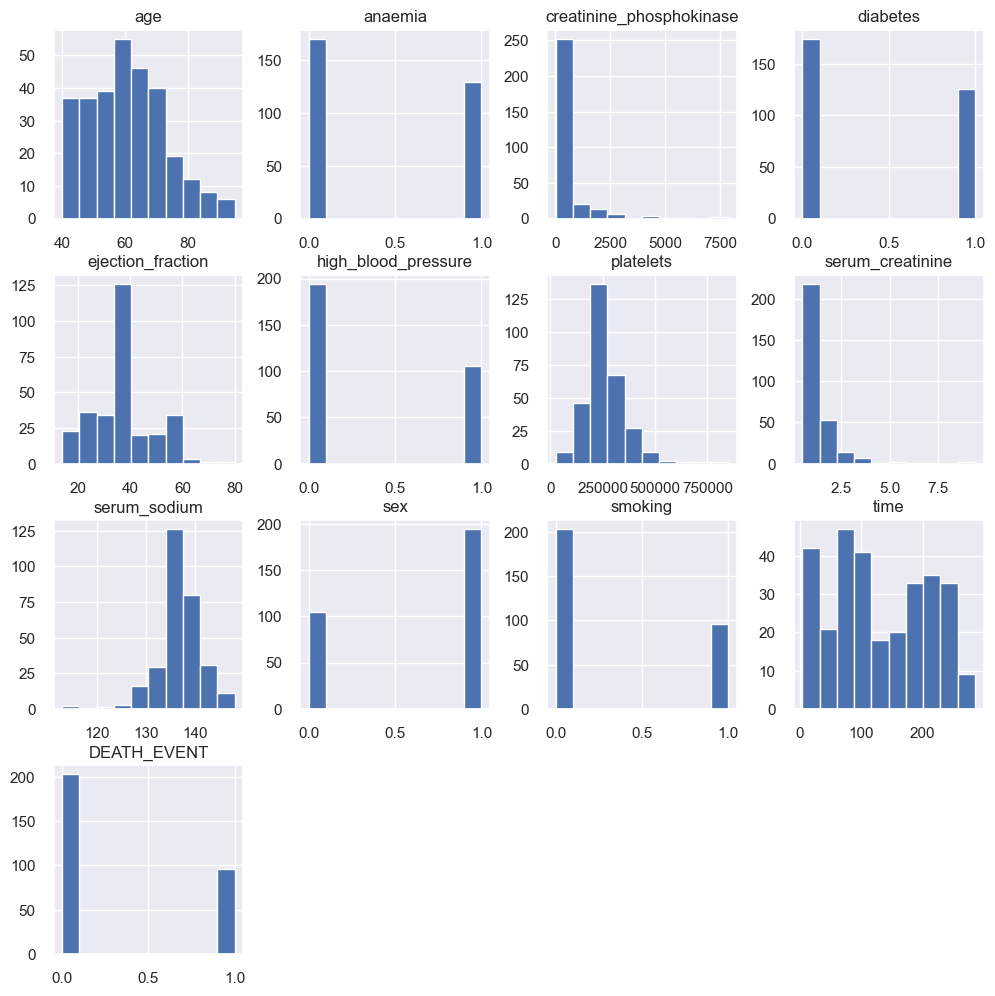

In [8]:
sns.set()
df.hist(figsize=(12,12))
plt.show()

<AxesSubplot:>

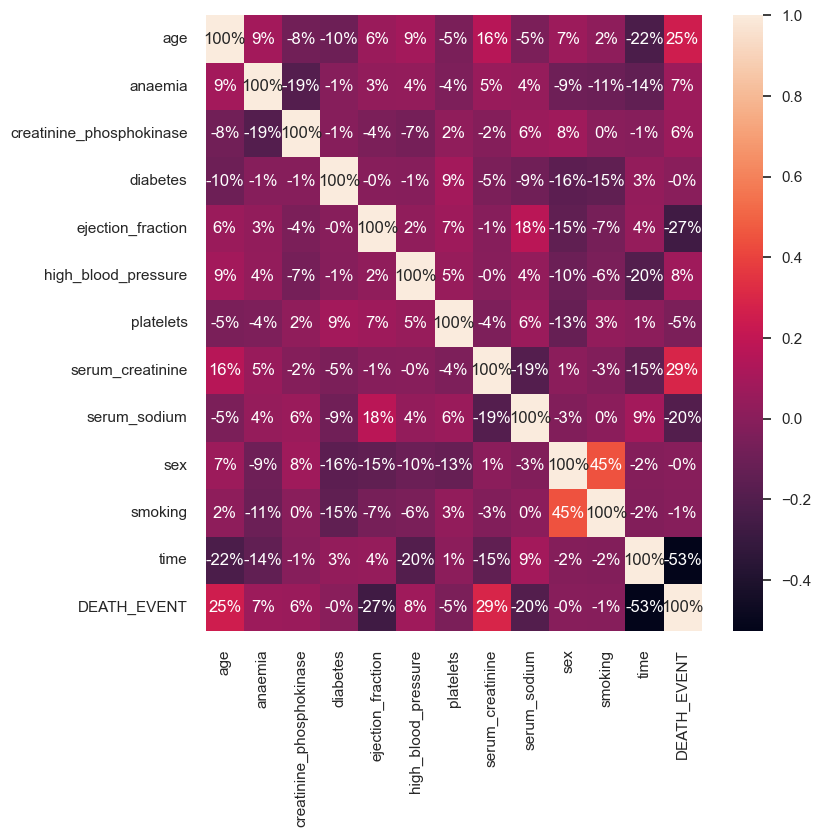

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, fmt=".0%")

In [10]:
df_some_interest_var=df[['age', 'smoking', 'sex', 'platelets', 'time','DEATH_EVENT' ]]
#df_some_interest_var

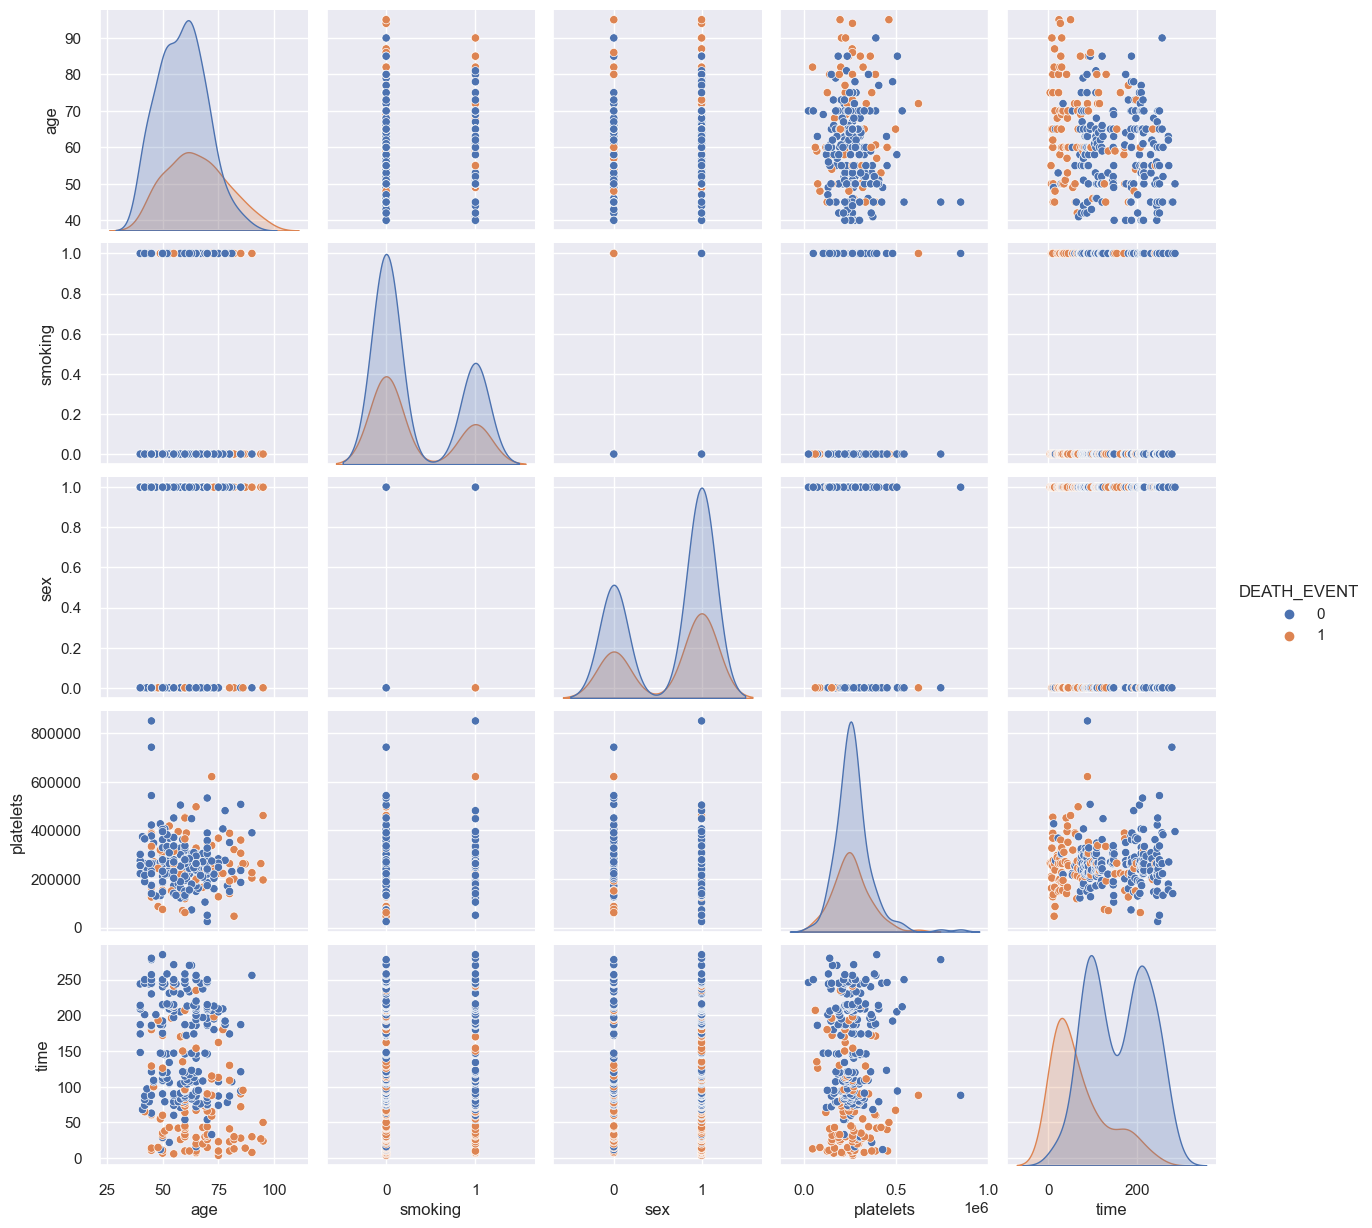

In [11]:
sns.pairplot(df_some_interest_var,hue='DEATH_EVENT', diag_kind='kde')

In [13]:
###############################################

In [14]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [15]:
from collections import Counter
print(Counter(df["DEATH_EVENT"]))

Counter({0: 203, 1: 96})


In [16]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # any number

In [17]:
X_train, X_test = scale_data(X_train, X_test)
# crucial important step

In [18]:
# |TN FP
# |FN TP

#Accuracy:(𝑇𝑃 + 𝑇𝑁)∕Total = (9 + 33)/60 = 0.70 
#Precision: 𝑇𝑃∕(𝑇𝑃 + 𝐹𝑃) = 9/(9+2) = ~ 0.82 
#Recall: 𝑇𝑃∕(𝑇𝑃 + 𝐹𝑁) = 9/(9+16) =  0.36 
#F1-Score: (2 * Precision * Recall)∕(Precision + Recall)= 2*0.82*0.36/(0.82+0.36)= ~ 0.50

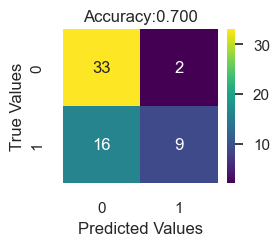

              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60



In [19]:
Naive_Bayers_Classifier(X_train, X_test, y_train, y_test)

In [20]:
# Macro average: the arithmetic average of a metric between the two classes.
# Macro average(precision) = (p0 + p1)/2 = (0.67 + 0.82)/2 = ~ 0.75

# Weighted average: the weighted average is calculated by dividing sum(metric of interest x weight) by sum(weights).
# Weighted average: (precision)= (p0 x s0 + p1 x s1)/(s0 + s1) = ((0.67*35) + (0.82 x 25))/(35 + 25) = ~ 0.73

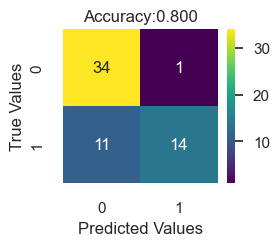

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



In [21]:
Logistic_Regression(X_train, X_test, y_train, y_test)

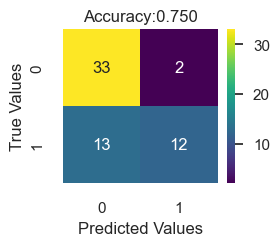

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [22]:
Support_Vector_Machine(X_train, X_test, y_train, y_test)

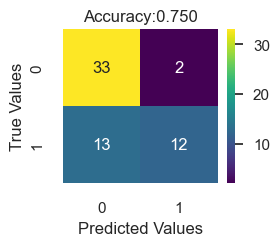

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [23]:
Random_Forest(X_train, X_test, y_train, y_test)

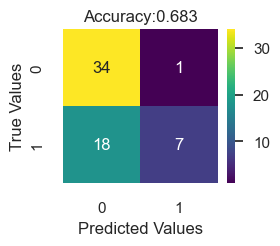

              precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60



In [24]:
K_nearest_neighbors(X_train, X_test, y_train, y_test)

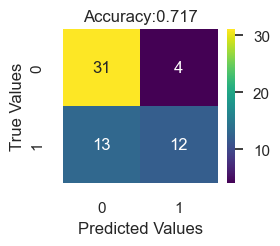

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60



In [25]:
MLP_neural_network(X_train, X_test, y_train, y_test)

In [26]:
df_compare_Original=df_compare_models(X_train, y_train, X_test, y_test)
# Enter: Original

Enter technique:Original


In [27]:
df_compare_Original

,Model,Technique,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,Original,0.70,0.82,0.36,0.50
1,Logistic Regression,Original,0.80,0.93,0.56,0.70
2,Support Vector Machine,Original,0.75,0.86,0.48,0.62
3,Random Forest,Original,0.73,0.85,0.44,0.58
4,K-Nearest Neighbors,Original,0.68,0.88,0.28,0.42
5,Multi-Layer Perceptron,Original,0.72,0.79,0.44,0.56


In [28]:
df_compare_Original.sort_values(by='Accuracy', ascending=False)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
1,Logistic Regression,Original,0.80,0.93,0.56,0.70
2,Support Vector Machine,Original,0.75,0.86,0.48,0.62
3,Random Forest,Original,0.73,0.80,0.48,0.60
5,Multi-Layer Perceptron,Original,0.72,0.75,0.48,0.59
0,Naive Bayes,Original,0.70,0.82,0.36,0.50
4,K-Nearest Neighbors,Original,0.68,0.88,0.28,0.42


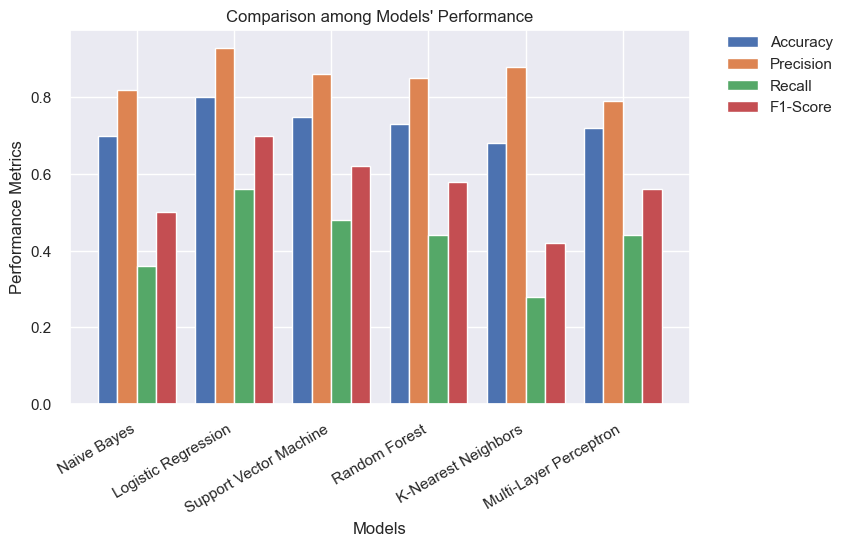

In [28]:
plot_compare_Original=plot_model_performance(df_compare_Original, ['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# CLASSIFICATION 2

## Sampling techniques

In [ ]:
############################# RUS - UNDERSAMPLING ##########################

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_under_resampled).items()))

[(0, 96), (1, 96)]


In [31]:
import pandas as pd
df1 = pd.DataFrame(X_under_resampled)
df1['DEATH_EVENT'] = y_under_resampled
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,1,203,1,38,1,283000.00,0.60,131,1,1,74,0
1,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
2,78.0,1,64,0,40,0,277000.00,0.70,137,1,1,187,0
3,65.0,1,335,0,35,1,235000.00,0.80,136,0,0,120,0
4,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
188,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
189,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
190,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


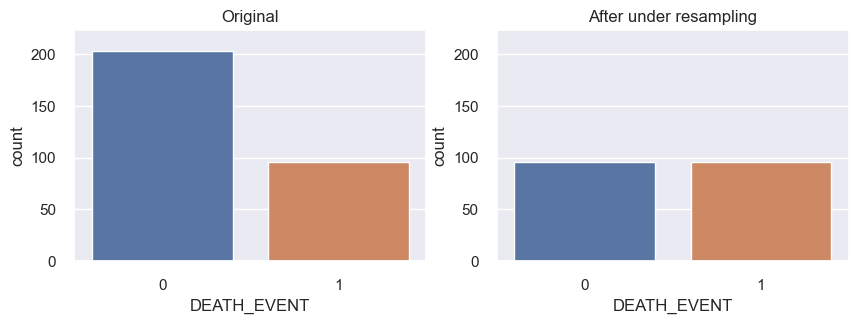

In [32]:
from collections import Counter
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

count = Counter(df["DEATH_EVENT"])
sns.countplot(df['DEATH_EVENT'], ax=axs[0])
axs[0].set_title('Original')

count1 = Counter(df1["DEATH_EVENT"])
sns.countplot(df1['DEATH_EVENT'], ax=axs[1])
axs[1].set_title('After under resampling')

y_max = max(count.values())

axs[0].set_ylim(0, y_max+20)
axs[1].set_ylim(0, y_max+20)
plt.show()

In [33]:
X1 = df1.drop('DEATH_EVENT', axis=1)
y1 = df1['DEATH_EVENT']

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [35]:
X1_train, X1_test = scale_data(X1_train, X1_test)

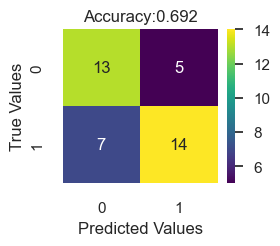

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.74      0.67      0.70        21

    accuracy                           0.69        39
   macro avg       0.69      0.69      0.69        39
weighted avg       0.70      0.69      0.69        39



In [37]:
Naive_Bayers_Classifier(X1_train, X1_test, y1_train, y1_test)

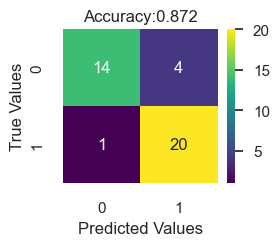

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.83      0.95      0.89        21

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.87        39
weighted avg       0.88      0.87      0.87        39



In [38]:
Logistic_Regression(X1_train, X1_test, y1_train, y1_test)

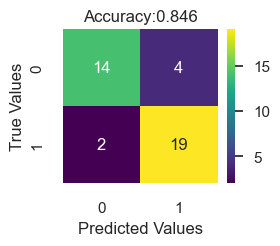

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.83      0.90      0.86        21

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.84        39
weighted avg       0.85      0.85      0.85        39



In [39]:
Support_Vector_Machine(X1_train, X1_test, y1_train, y1_test)

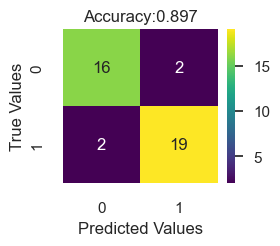

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.90      0.90      0.90        21

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [40]:
Random_Forest(X1_train, X1_test, y1_train, y1_test)

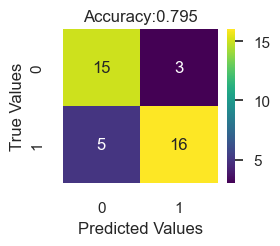

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.84      0.76      0.80        21

    accuracy                           0.79        39
   macro avg       0.80      0.80      0.79        39
weighted avg       0.80      0.79      0.80        39



In [41]:
K_nearest_neighbors(X1_train, X1_test, y1_train, y1_test)

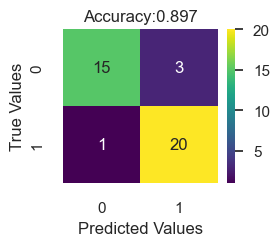

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.87      0.95      0.91        21

    accuracy                           0.90        39
   macro avg       0.90      0.89      0.90        39
weighted avg       0.90      0.90      0.90        39



In [42]:
MLP_neural_network(X1_train, X1_test, y1_train, y1_test)

In [43]:
df_compare_RUS=df_compare_models(X1_train, y1_train, X1_test,  y1_test)
# Enter: RUS

Enter technique:RUS


In [44]:
df_compare_RUS.sort_values(by='Accuracy', ascending=False)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
3,Random Forest,RUS,0.92,0.91,0.95,0.93
5,Multi-Layer Perceptron,RUS,0.90,0.87,0.95,0.91
1,Logistic Regression,RUS,0.87,0.83,0.95,0.89
2,Support Vector Machine,RUS,0.85,0.83,0.90,0.86
4,K-Nearest Neighbors,RUS,0.79,0.84,0.76,0.80
0,Naive Bayes,RUS,0.69,0.74,0.67,0.70


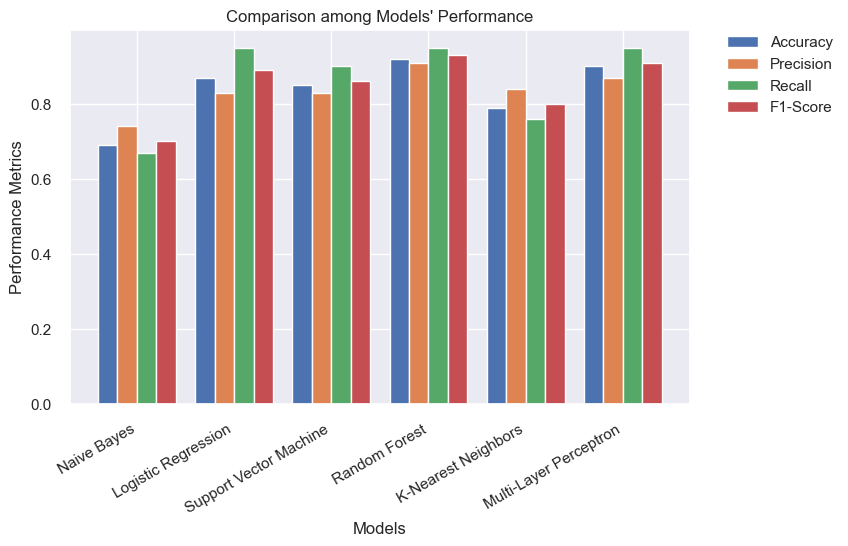

In [46]:
plot_compare_RUS=plot_model_performance(df_compare_RUS, ['Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [47]:
############################# SMOTE - OVER SAMPLING ##########################

In [48]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_over_resampled, y_over_resampled = smo.fit_resample(X, y)

In [49]:
df2 = pd.DataFrame(X_over_resampled)
df2['DEATH_EVENT'] = y_over_resampled
df2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,57.872410,0,413,0,35,0,386103.349398,4.089378,140,1,0,42,1
402,81.219976,0,582,0,31,0,263358.030000,1.830000,134,0,0,132,1
403,53.664703,0,1539,0,33,0,70235.886240,1.193176,136,0,0,155,1
404,77.321127,1,388,0,17,0,133034.929107,2.685521,135,1,0,24,1


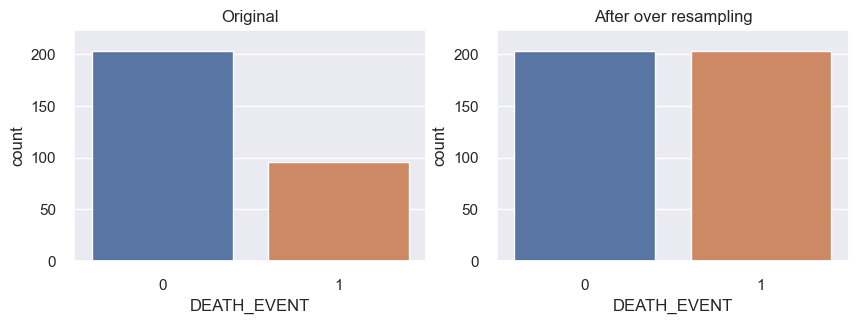

In [50]:
from collections import Counter
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

count = Counter(df["DEATH_EVENT"])
sns.countplot(df['DEATH_EVENT'], ax=axs[0])
axs[0].set_title('Original')

count2 = Counter(df2["DEATH_EVENT"])
sns.countplot(df2['DEATH_EVENT'], ax=axs[1])
axs[1].set_title('After over resampling')

y_max = max(count.values())

axs[0].set_ylim(0, y_max+20)
axs[1].set_ylim(0, y_max+20)
plt.show()

In [51]:
X2 = df2.drop('DEATH_EVENT', axis=1)
y2 = df2['DEATH_EVENT']

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [53]:
X2_train, X2_test = scale_data(X2_train, X2_test)

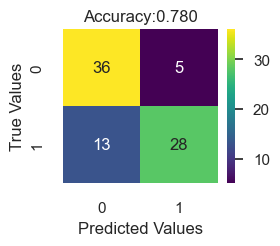

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.85      0.68      0.76        41

    accuracy                           0.78        82
   macro avg       0.79      0.78      0.78        82
weighted avg       0.79      0.78      0.78        82



In [54]:
Naive_Bayers_Classifier(X2_train, X2_test, y2_train, y2_test)

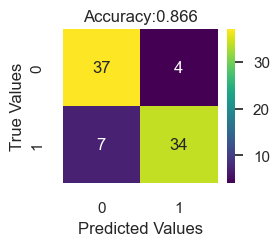

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.89      0.83      0.86        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



In [55]:
Logistic_Regression(X2_train, X2_test, y2_train, y2_test)

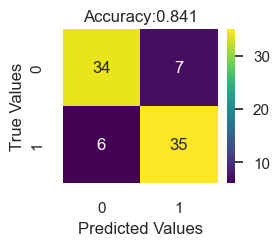

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.83      0.85      0.84        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



In [56]:
Support_Vector_Machine(X2_train, X2_test, y2_train, y2_test)

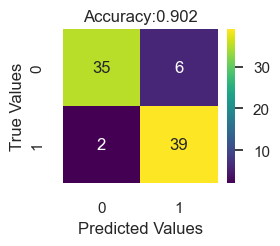

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.87      0.95      0.91        41

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82



In [57]:
Random_Forest(X2_train, X2_test, y2_train, y2_test)

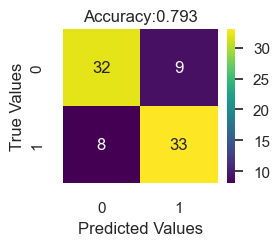

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.79      0.80      0.80        41

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



In [58]:
K_nearest_neighbors(X2_train, X2_test, y2_train, y2_test)

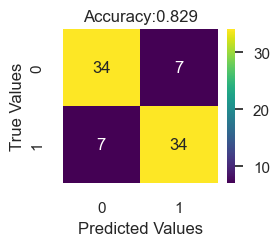

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.83      0.83      0.83        41

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82



In [59]:
MLP_neural_network(X2_train, X2_test, y2_train, y2_test)

In [60]:
df_compare_SMOTE=df_compare_models(X2_train, y2_train, X2_test,  y2_test)
#Enter: SMOTE

Enter technique:SMOTE


In [61]:
df_compare_SMOTE.sort_values(by=['Accuracy'], ascending=False)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
3,Random Forest,SMOTE,0.89,0.85,0.95,0.90
1,Logistic Regression,SMOTE,0.87,0.89,0.83,0.86
5,Multi-Layer Perceptron,SMOTE,0.87,0.86,0.88,0.87
2,Support Vector Machine,SMOTE,0.84,0.83,0.85,0.84
4,K-Nearest Neighbors,SMOTE,0.79,0.79,0.80,0.80
0,Naive Bayes,SMOTE,0.78,0.85,0.68,0.76


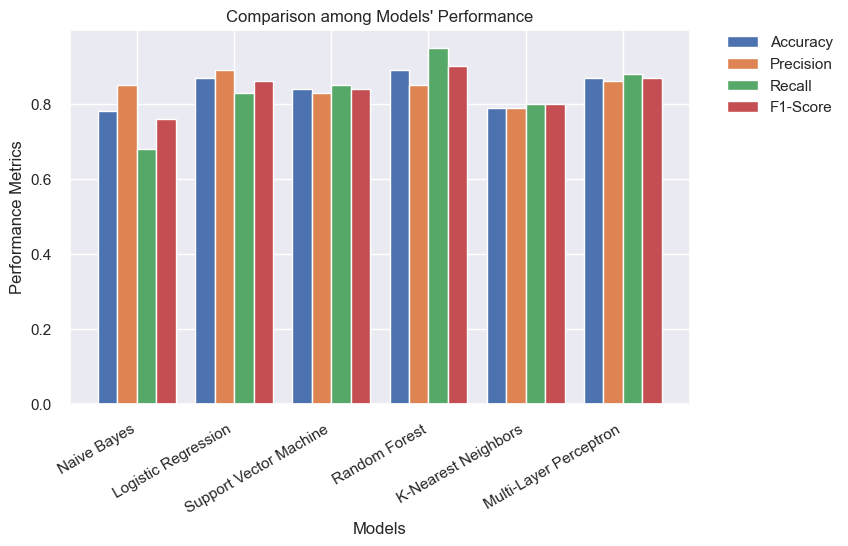

In [62]:
plot_compare_SMOTE=plot_model_performance(df_compare_SMOTE, ['Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [63]:
df_RUS_SMOTE_Ori = pd.concat([df_compare_RUS,df_compare_SMOTE, df_compare_Original], axis=0)

In [64]:
df_RUS_SMOTE_Ori.sort_values(by=['Model','Technique'], ascending=True)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
4,K-Nearest Neighbors,Original,0.68,0.88,0.28,0.42
4,K-Nearest Neighbors,RUS,0.79,0.84,0.76,0.80
4,K-Nearest Neighbors,SMOTE,0.79,0.79,0.80,0.80
1,Logistic Regression,Original,0.80,0.93,0.56,0.70
1,Logistic Regression,RUS,0.87,0.83,0.95,0.89
1,Logistic Regression,SMOTE,0.87,0.89,0.83,0.86
5,Multi-Layer Perceptron,Original,0.72,0.75,0.48,0.59
5,Multi-Layer Perceptron,RUS,0.90,0.87,0.95,0.91
5,Multi-Layer Perceptron,SMOTE,0.87,0.86,0.88,0.87
0,Naive Bayes,Original,0.70,0.82,0.36,0.50


In [65]:
# sort Accuracy
df_RUS_SMOTE_Ori.sort_values(by='Accuracy', ascending=False)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
3,Random Forest,RUS,0.92,0.91,0.95,0.93
5,Multi-Layer Perceptron,RUS,0.90,0.87,0.95,0.91
3,Random Forest,SMOTE,0.89,0.85,0.95,0.90
1,Logistic Regression,SMOTE,0.87,0.89,0.83,0.86
1,Logistic Regression,RUS,0.87,0.83,0.95,0.89
5,Multi-Layer Perceptron,SMOTE,0.87,0.86,0.88,0.87
2,Support Vector Machine,RUS,0.85,0.83,0.90,0.86
2,Support Vector Machine,SMOTE,0.84,0.83,0.85,0.84
1,Logistic Regression,Original,0.80,0.93,0.56,0.70
4,K-Nearest Neighbors,RUS,0.79,0.84,0.76,0.80


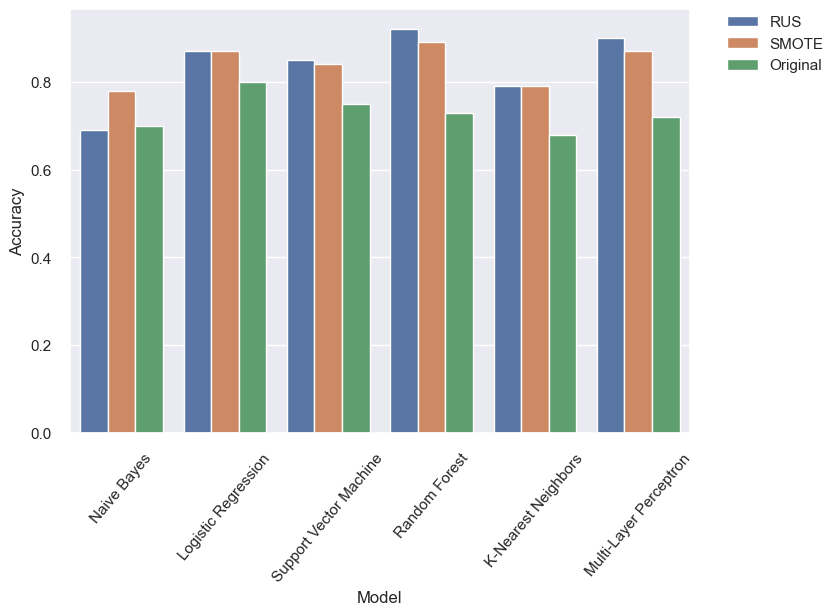

In [66]:
sns.barplot(x='Model', y='Accuracy', hue='Technique', data=df_RUS_SMOTE_Ori)
plt.xticks(rotation=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# FEATURE SELECTION

In [67]:
significant_features_man_chi(df, 'DEATH_EVENT')

Mann Whitney significant features:  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
Chi Square significant features:  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']


<AxesSubplot:>

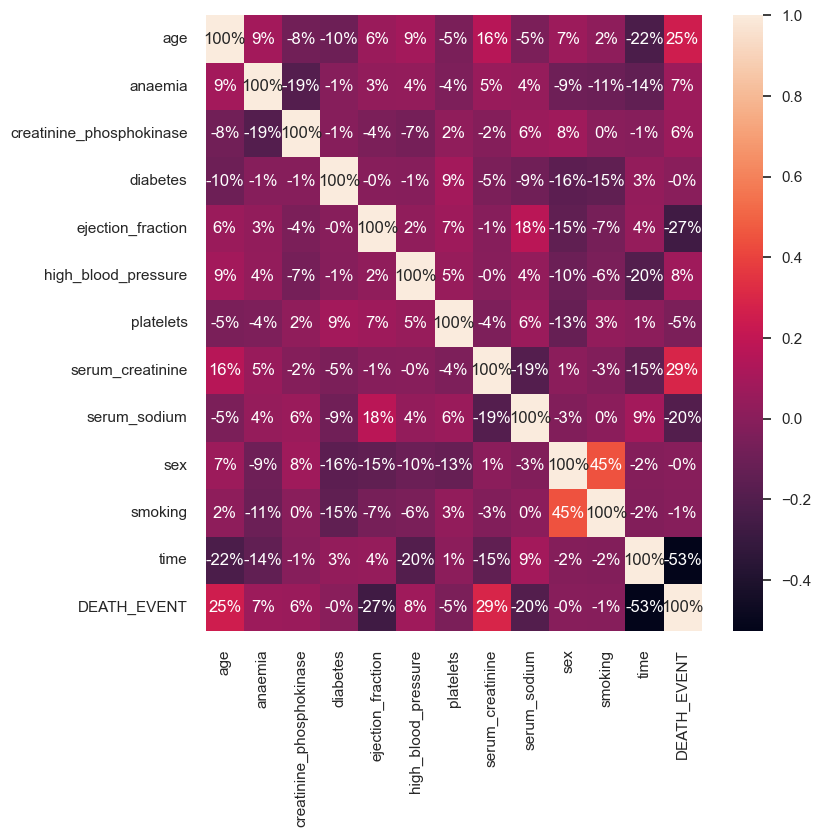

In [68]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, fmt=".0%")

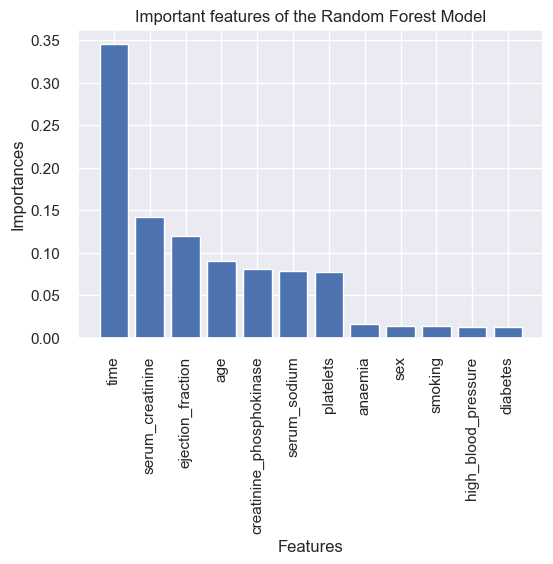

In [69]:
feature_importance_grap_RandomForest(X,y)

# CLASSIFICATION 3

In [70]:
#Using Mann-Whitney test or Chi-Square test
df_selected1=df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time','DEATH_EVENT' ]]
df_selected1

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


In [71]:
X_new1 = df_selected1.drop('DEATH_EVENT', axis=1)
y_new1 = df_selected1['DEATH_EVENT']

In [72]:
X_new1_train, X_new1_test, y_new1_train, y_new1_test = train_test_split(X_new1, y_new1, test_size=0.2, random_state=42)

In [73]:
X_new1_train, X_new1_test = scale_data(X_new1_train, X_new1_test)

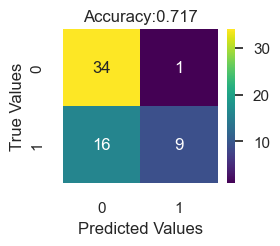

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        35
           1       0.90      0.36      0.51        25

    accuracy                           0.72        60
   macro avg       0.79      0.67      0.66        60
weighted avg       0.77      0.72      0.68        60



In [74]:
Naive_Bayers_Classifier(X_new1_train, X_new1_test, y_new1_train, y_new1_test)

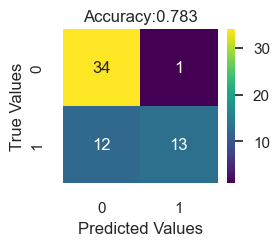

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52      0.67        25

    accuracy                           0.78        60
   macro avg       0.83      0.75      0.75        60
weighted avg       0.82      0.78      0.77        60



In [75]:
Logistic_Regression(X_new1_train, X_new1_test, y_new1_train, y_new1_test)

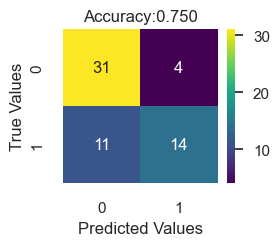

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.78      0.56      0.65        25

    accuracy                           0.75        60
   macro avg       0.76      0.72      0.73        60
weighted avg       0.75      0.75      0.74        60



In [76]:
Support_Vector_Machine(X_new1_train, X_new1_test, y_new1_train, y_new1_test)

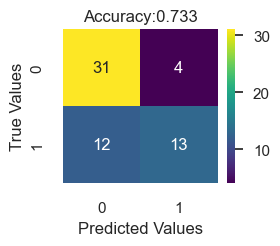

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



In [77]:
Random_Forest(X_new1_train, X_new1_test, y_new1_train, y_new1_test)

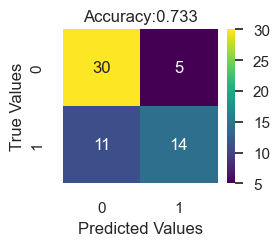

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.74      0.56      0.64        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.71        60
weighted avg       0.73      0.73      0.73        60



In [78]:
K_nearest_neighbors(X_new1_train, X_new1_test, y_new1_train, y_new1_test)

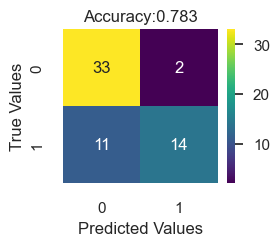

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



In [79]:
MLP_neural_network(X_new1_train, X_new1_test, y_new1_train, y_new1_test)

In [80]:
df_compare_Selection1=df_compare_models(X_new1_train,y_new1_train, X_new1_test,  y_new1_test)
# Enter: Selection1

Enter technique:Selection1


In [81]:
df_compare_Selection1

,Model,Technique,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,Selection1,0.72,0.90,0.36,0.51
1,Logistic Regression,Selection1,0.78,0.93,0.52,0.67
2,Support Vector Machine,Selection1,0.75,0.78,0.56,0.65
3,Random Forest,Selection1,0.77,0.92,0.48,0.63
4,K-Nearest Neighbors,Selection1,0.73,0.74,0.56,0.64
5,Multi-Layer Perceptron,Selection1,0.73,0.76,0.52,0.62


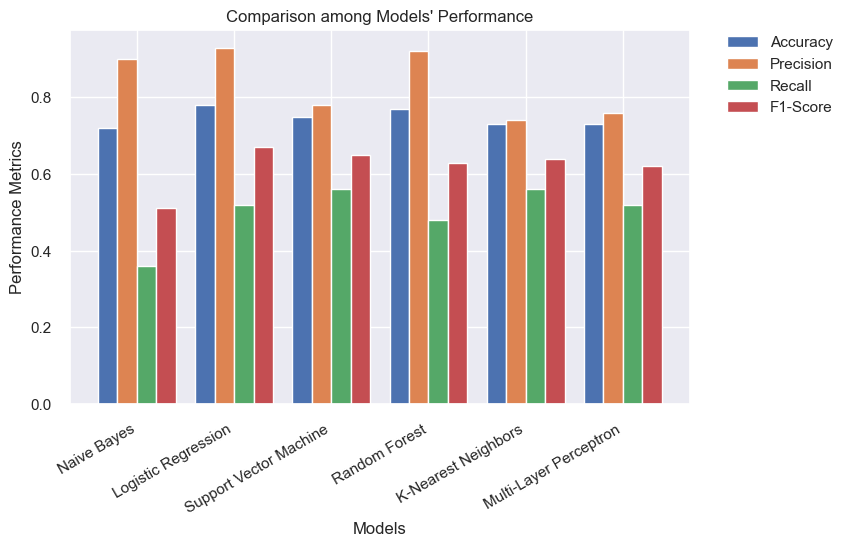

In [82]:
plot_compare_Selection1=plot_model_performance(df_compare_Selection1, ['Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [83]:
##############

In [84]:
# using Random Forest Classifier for selecting importances
df_selected2=df[['time', 'serum_creatinine', 'ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'age', 'DEATH_EVENT' ]]

In [85]:
df_selected2

,time,serum_creatinine,ejection_fraction,creatinine_phosphokinase,platelets,serum_sodium,age,DEATH_EVENT
0,4,1.9,20,582,265000.00,130,75.0,1
1,6,1.1,38,7861,263358.03,136,55.0,1
2,7,1.3,20,146,162000.00,129,65.0,1
3,7,1.9,20,111,210000.00,137,50.0,1
4,8,2.7,20,160,327000.00,116,65.0,1
...,...,...,...,...,...,...,...,...
294,270,1.1,38,61,155000.00,143,62.0,0
295,271,1.2,38,1820,270000.00,139,55.0,0
296,278,0.8,60,2060,742000.00,138,45.0,0
297,280,1.4,38,2413,140000.00,140,45.0,0


In [86]:
X_new2 = df_selected2.drop('DEATH_EVENT', axis=1)
y_new2 = df_selected2['DEATH_EVENT']

In [87]:
X_new2_train, X_new2_test, y_new2_train, y_new2_test = train_test_split(X_new2, y_new2, test_size=0.2, random_state=42)

In [88]:
X_new2_train, X_new2_test = scale_data(X_new2_train, X_new2_test)

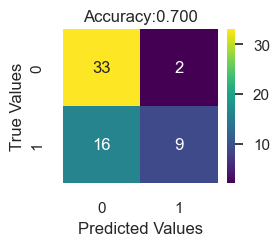

              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60



In [89]:
Naive_Bayers_Classifier(X_new2_train, X_new2_test, y_new2_train, y_new2_test)

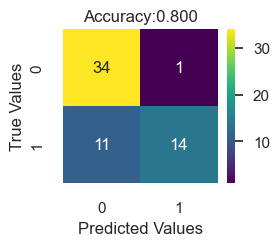

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



In [90]:
Logistic_Regression(X_new2_train, X_new2_test, y_new2_train, y_new2_test)

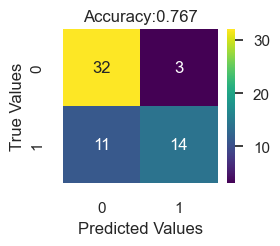

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



In [91]:
Support_Vector_Machine(X_new2_train, X_new2_test, y_new2_train, y_new2_test)

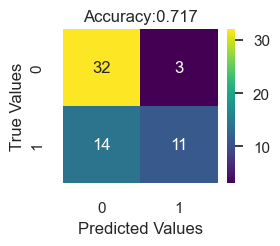

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60



In [92]:
Random_Forest(X_new2_train, X_new2_test, y_new2_train, y_new2_test)

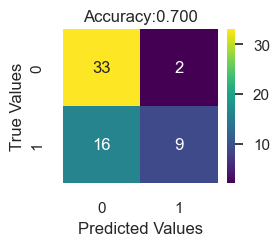

              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60



In [93]:
K_nearest_neighbors(X_new2_train, X_new2_test, y_new2_train, y_new2_test)

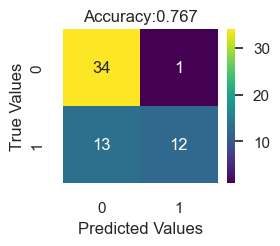

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        35
           1       0.92      0.48      0.63        25

    accuracy                           0.77        60
   macro avg       0.82      0.73      0.73        60
weighted avg       0.81      0.77      0.75        60



In [94]:
MLP_neural_network(X_new2_train, X_new2_test, y_new2_train, y_new2_test)

In [95]:
df_compare_Selection2=df_compare_models(X_new2_train, y_new2_train, X_new2_test,  y_new2_test)
#Enter: Selection2

Enter technique:Selection2


In [96]:
df_compare_Selection2

,Model,Technique,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,Selection2,0.70,0.82,0.36,0.50
1,Logistic Regression,Selection2,0.80,0.93,0.56,0.70
2,Support Vector Machine,Selection2,0.77,0.82,0.56,0.67
3,Random Forest,Selection2,0.73,0.80,0.48,0.60
4,K-Nearest Neighbors,Selection2,0.70,0.82,0.36,0.50
5,Multi-Layer Perceptron,Selection2,0.75,0.86,0.48,0.62


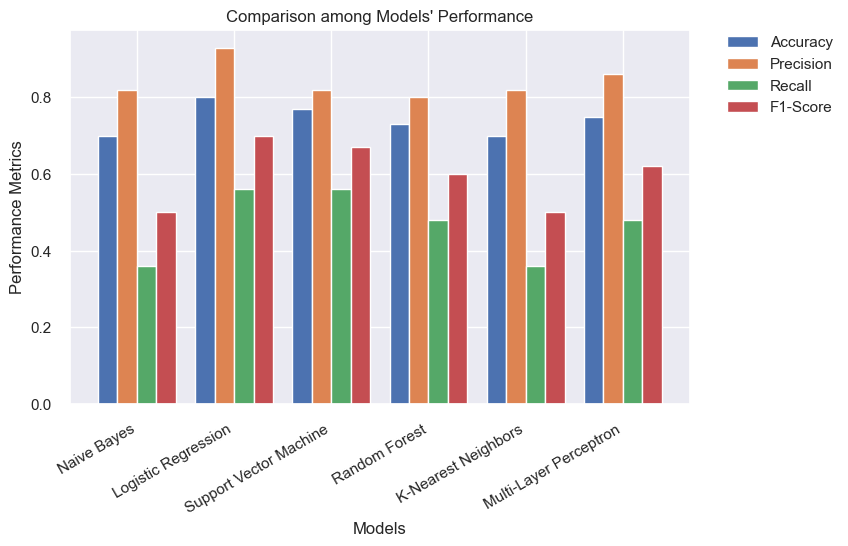

In [97]:
plot_compare_Selection2=plot_model_performance(df_compare_Selection2, ['Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [98]:
df_compare_S1_S2_O = pd.concat([df_compare_Selection1,df_compare_Selection2, df_compare_Original], axis=0)
df_compare_S1_S2_O.sort_values(by=['Model','Technique'], ascending=True)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
4,K-Nearest Neighbors,Original,0.68,0.88,0.28,0.42
4,K-Nearest Neighbors,Selection1,0.73,0.74,0.56,0.64
4,K-Nearest Neighbors,Selection2,0.70,0.82,0.36,0.50
1,Logistic Regression,Original,0.80,0.93,0.56,0.70
1,Logistic Regression,Selection1,0.78,0.93,0.52,0.67
1,Logistic Regression,Selection2,0.80,0.93,0.56,0.70
5,Multi-Layer Perceptron,Original,0.72,0.75,0.48,0.59
5,Multi-Layer Perceptron,Selection1,0.73,0.76,0.52,0.62
5,Multi-Layer Perceptron,Selection2,0.75,0.86,0.48,0.62
0,Naive Bayes,Original,0.70,0.82,0.36,0.50


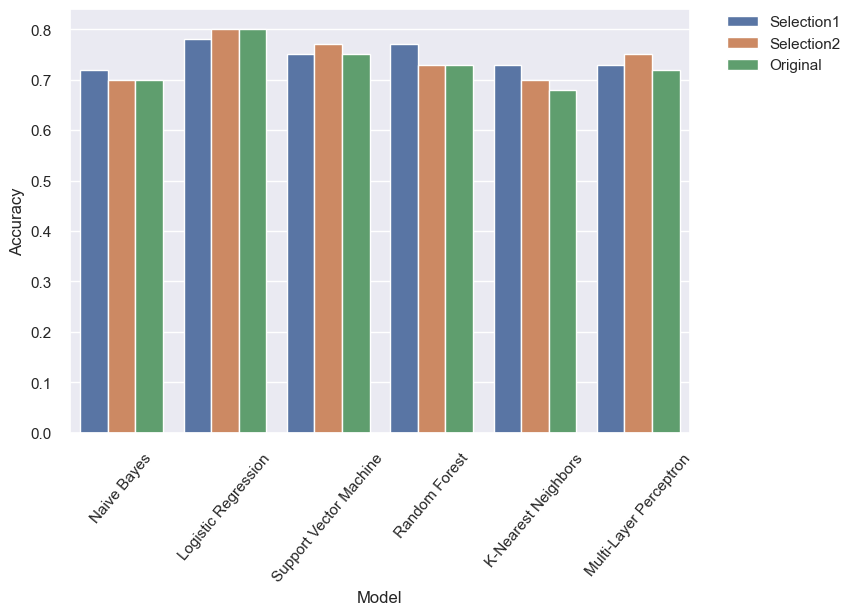

In [99]:
sns.barplot(x='Model', y='Accuracy', hue='Technique', data=df_compare_S1_S2_O)
plt.xticks(rotation=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [100]:
#########*****************###############****************################****************

In [101]:
# COMPARE PERFORMANCE OF MODELS IN DIFFERENT TECHNIQUES

In [102]:
df_compare_all = pd.concat([df_compare_RUS, df_compare_SMOTE, df_compare_Selection1, df_compare_Selection2, df_compare_Original], axis=0)
df_compare_all.sort_values(by=['Model','Technique'], ascending=True)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
4,K-Nearest Neighbors,Original,0.68,0.88,0.28,0.42
4,K-Nearest Neighbors,RUS,0.79,0.84,0.76,0.80
4,K-Nearest Neighbors,SMOTE,0.79,0.79,0.80,0.80
4,K-Nearest Neighbors,Selection1,0.73,0.74,0.56,0.64
4,K-Nearest Neighbors,Selection2,0.70,0.82,0.36,0.50
1,Logistic Regression,Original,0.80,0.93,0.56,0.70
1,Logistic Regression,RUS,0.87,0.83,0.95,0.89
1,Logistic Regression,SMOTE,0.87,0.89,0.83,0.86
1,Logistic Regression,Selection1,0.78,0.93,0.52,0.67
1,Logistic Regression,Selection2,0.80,0.93,0.56,0.70


In [103]:
df_compare_all.sort_values(by='Accuracy', ascending=False)

,Model,Technique,Accuracy,Precision,Recall,F1-Score
3,Random Forest,RUS,0.92,0.91,0.95,0.93
5,Multi-Layer Perceptron,RUS,0.90,0.87,0.95,0.91
3,Random Forest,SMOTE,0.89,0.85,0.95,0.90
5,Multi-Layer Perceptron,SMOTE,0.87,0.86,0.88,0.87
1,Logistic Regression,RUS,0.87,0.83,0.95,0.89
1,Logistic Regression,SMOTE,0.87,0.89,0.83,0.86
2,Support Vector Machine,RUS,0.85,0.83,0.90,0.86
2,Support Vector Machine,SMOTE,0.84,0.83,0.85,0.84
1,Logistic Regression,Selection2,0.80,0.93,0.56,0.70
1,Logistic Regression,Original,0.80,0.93,0.56,0.70


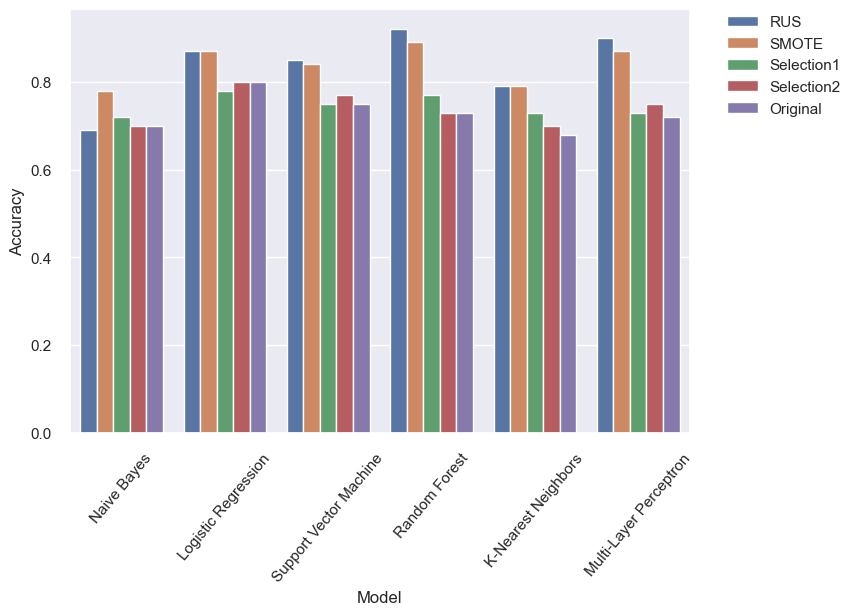

In [104]:
sns.barplot(x='Model', y='Accuracy', hue='Technique', data=df_compare_all)
plt.xticks(rotation=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In summary, after evaluating the performance of 6 different machine learning models, it was found that the Logistic Regression model demonstrated the highest performance, closely followed by the Support Vector Machine. 

The performance of the Random Forest and Multi-Layer Perceptron models was found to be slightly more variable, and may be sensitive to changes in the algorithm and specific parameters used. 

In order to optimize the performance of the models, it is recommended to use techniques such as balancing the dataset and selecting relevant features. Based on the results of this project, it is suggested to use the Logistic Regression model for future predictions and also consider applying resampling techniques to further improve the model's performance.
